In [167]:
import seaborn as sns
sns.set_style("whitegrid")
from process_model import *
from fit_process import *
from scipy.stats import norm, pearsonr
from scipy.stats.mstats import mquantiles

import pickle

from mypy.explib.technion import technion


def pmatch(pair):
    observed, predicted = pair
    
    if observed == 0.5 or predicted == 0.5:
        return 0.5
    elif (observed < 0.5 and predicted < 0.5) or (observed > 0.5 and predicted > 0.5):
        return 1
    else:
        return 0



#FIGDEST = '/Users/markant/Dropbox/Apps/ShareLaTeX/ssDFE/ssDFE_v3/figures/'

bf_par = {}

cp = {}
bf_cp = {}

quant = {}
bf_quant = {}

N_ITER = 1

# Load data

In [2]:
with open('paper/data/tpt/tpt_problems.pkl', 'r') as f:
    problems = pickle.load(f)

In [168]:
technion.load_data('est')
problems = {(gid-1): technion.get_options(gid) for gid in technion.problems}
problems_srt = technion.problems_srt - 1

data = pd.read_csv('paper/data/tpt/tpt_data_est.csv', index_col=0)
data['group'] = 0

SIM_ID = 'process_tpt_est'
cp[SIM_ID]    = np.array([data[data.problem==i].choice.mean() for i in problems_srt])

problems_srt_cp = np.array((problems_srt[:20][cp[SIM_ID][:20].argsort()],
          problems_srt[20:40][cp[SIM_ID][20:40].argsort()],
          problems_srt[40:][cp[SIM_ID][40:].argsort()])).ravel()

In [4]:
pid = 49

pars = {'N': 1000,
        'max_T': 1000,
        'probid': pid,
        'tau': .001,
        'theta': .1}


m = CHASEProcessModel(problems=problems)
results = m(problems[pid], pars, trackobs=True)

/Users/markant/code/chase/chase/cpt.py:40: RuntimeWarning: divide by zero encountered in log
  f = np.exp(-delta * ((-np.log(p)) ** gamma))
process_model.py:95: RuntimeWarning: invalid value encountered in divide
  omega.append(weights[i]/option[:,1])


In [5]:
problems[pid]

array([[[ 2.8 ,  1.  ],
        [ 0.  ,  0.  ]],

       [[ 5.8 ,  0.04],
        [ 2.7 ,  0.96]]])

In [6]:
results['p_resp']

array([ 0.715,  0.285])

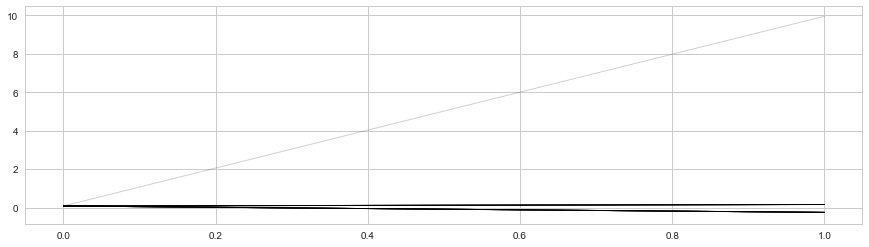

In [7]:
fig, ax = plt.subplots(figsize=(15,4))
for i in range(100):
    ax.plot(results['traces'][i],
            color='black', alpha=.2, linewidth=.9)
plt.show()

In [8]:
data_cp = np.array([data[data.problem==pid]['choice'].mean() for pid in problems_srt_cp])
data_ss = np.array([np.median(data[data.problem==pid]['samplesize']) for pid in problems_srt_cp])

In [161]:
arr = []
for i in problems:
    arr.append(np.mean([expected_value(problems[i][0]), expected_value(problems[i][1])]))

In [ ]:
c_sigma                                                       12.9146
prelec_elevation                                              1.16009
prelec_gamma                                                  1.54731
sc                                                           0.801339
tau                                                           13.6117
theta                                                         40.4382

In [164]:
for pid in problems:
    print [expected_variance(option) for option in problems[pid]]

[0.12441600000000011, 0.0]
[0.5172750000000006, 0.0]
[16.634100000000018, 0.0]
[0.0, 58.982400000000098]
[0.43559999999999999, 0.0]
[0.0, 0.87476399999999188]
[0.0, 44.763599999999997]
[0.0, 3.0275999999999854]
[5.3371000000000066, 0.0]
[1.7671359999999994, 0.0]
[0.0, 2.4149160000000336]
[0.0, 7.3297440000000122]
[3.3516000000000332, 0.0]
[0.0, 27.477599999999939]
[0.0, 22.283136000000013]
[10.171875, 0.0]
[0.0, 20.249999999999886]
[4.4943999999999704, 0.0]
[0.0, 10.889999999999993]
[33.417599999999993, 0.0]
[5.3361000000000054, 0.0]
[20.966400000000007, 0.0]
[19.009600000000002, 0.0]
[16.610274999999973, 0.0]
[0.0, 3.8415999999999855]
[0.0, 6.502275000000008]
[6.3804509999999972, 0.0]
[7.1823999999999977, 0.0]
[0.0, 7.6573440000000019]
[0.0, 9.3767309999999959]
[3.4318749999999909, 0.0]
[0.0, 8.9115389999999906]
[9.5861760000000089, 0.0]
[0.0, 1.4895999999999994]
[0.0, 6.7730039999999967]
[14.632415999999999, 0.0]
[17.639999999999997, 0.0]
[10.833291000000003, 0.0]
[0.0, 51.1056000000

In [162]:
maxvar = np.array([np.max([expected_variance(option) for option in problems[pid]]) for pid in problems_srt_cp])

In [165]:
1/np.mean(maxvar)

0.089417870571861777

In [170]:
pars = {'N': 1000,
        'max_T': 1000,
        'tau_rel_trunc': .001,
        'c_sigma': .001,
        'sc_x': .089}
m = CHASEProcessModel(problems=problems)

thetas = [.1, 1, 10]

arr = []
for pid in problems:
    pars['probid'] = pid
    if pid%10==0: print pid
    
    for theta in thetas:
        #print theta
        pars['theta'] = theta
    
        results = m(problems[pid], pars)
        cp = results['p_resp']
        ss = np.median(results['samplesize'])
        arr.append([pid, theta, cp[1], ss])
        
df = pd.DataFrame(arr, columns=['problem', 'theta', 'p(H)', 'med(ss)'])

0


process_model.py:96: RuntimeWarning: invalid value encountered in divide
  omega.append(weights[i]/option[:,1])


10
20
30
40
50


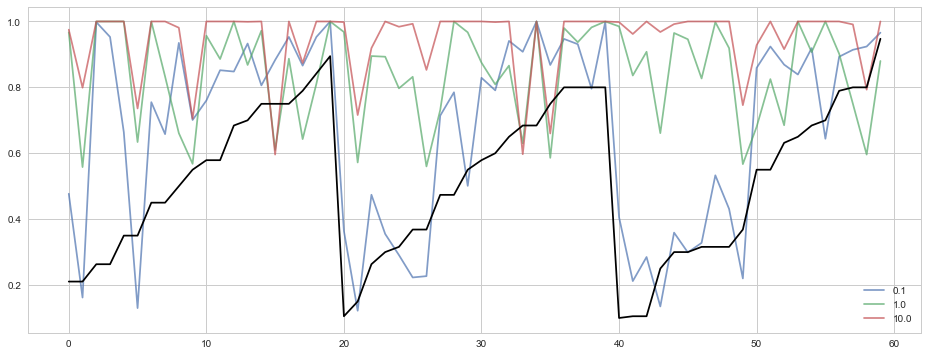

In [171]:
fig, ax = plt.subplots(figsize=(16,6))
for i, grp in df.groupby('theta'):
    choiceprob = np.array([grp[grp.problem==pid]['p(H)'].values[0] for pid in problems_srt_cp])
    ax.plot(choiceprob, alpha=.7, label=grp['theta'].values[0])
    
ax.plot(data_cp, color='black')
ax.legend()
plt.show()

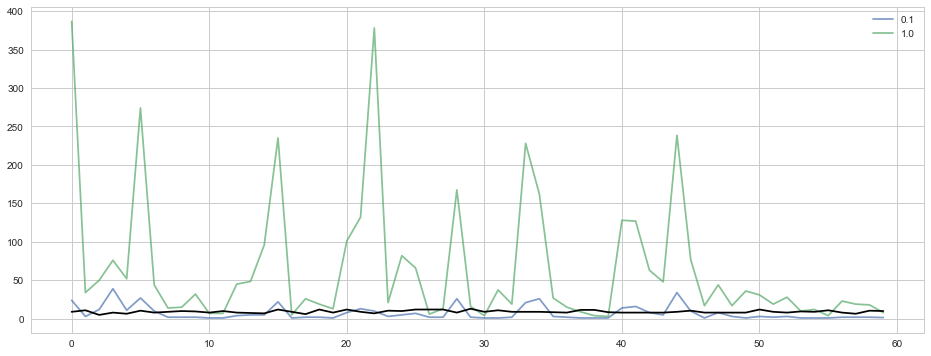

In [172]:
fig, ax = plt.subplots(figsize=(16,6))
for i, grp in df[df.theta < 5].groupby('theta'):
    ss = np.array([grp[grp.problem==pid]['med(ss)'].values[0] for pid in problems_srt_cp])
    ax.plot(ss, alpha=.7, label=grp['theta'].values[0])
    
ax.plot(data_ss, color='black')
ax.legend()
plt.show()

In [186]:
problems

{0: array([[[-0.3 ,  0.96],
         [-2.1 ,  0.04]],
 
        [[-0.3 ,  1.  ],
         [ 0.  ,  0.  ]]]), 1: array([[[-0.9 ,  0.95],
         [-4.2 ,  0.05]],
 
        [[-1.  ,  1.  ],
         [ 0.  ,  0.  ]]]), 2: array([[[ -6.3,   0.3],
         [-15.2,   0.7]],
 
        [[-12.2,   1. ],
         [  0. ,   0. ]]]), 3: array([[[-25.6,   1. ],
         [  0. ,   0. ]],
 
        [[-10. ,   0.2],
         [-29.2,   0.8]]]), 4: array([[[-1.7,  0.9],
         [-3.9,  0.1]],
 
        [[-1.9,  1. ],
         [ 0. ,  0. ]]]), 5: array([[[ -6.40000000e+00,   1.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00]],
 
        [[ -6.30000000e+00,   9.90000000e-01],
         [ -1.57000000e+01,   1.00000000e-02]]]), 6: array([[[-11.7,   1. ],
         [  0. ,   0. ]],
 
        [[ -5.6,   0.7],
         [-20.2,   0.3]]]), 7: array([[[-6. ,  1. ],
         [ 0. ,  0. ]],
 
        [[-0.7,  0.1],
         [-6.5,  0.9]]]), 8: array([[[ -5.7 ,   0.95],
         [-16.3 ,   0.05]],
 
    

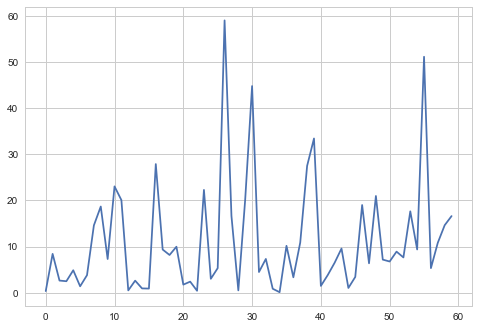

In [188]:
plt.plot(maxvar)

# Fit TPT

In [174]:
cp = {}

In [175]:
technion.load_data('est')
problems = {(gid-1): technion.get_options(gid) for gid in technion.problems}
problems_srt = technion.problems_srt - 1

data = pd.read_csv('paper/data/tpt/tpt_data_est.csv', index_col=0)
data['group'] = 0

SIM_ID = 'process_tpt_est'
cp[SIM_ID]    = np.array([data[data.problem==i].choice.mean() for i in problems_srt])

problems_srt_cp = np.array((problems_srt[:20][cp[SIM_ID][:20].argsort()],
          problems_srt[20:40][cp[SIM_ID][20:40].argsort()],
          problems_srt[40:][cp[SIM_ID][40:].argsort()])).ravel()

In [196]:
SIM_ID = 'process_tpt_est'
OUTDIR = 'process_fitresults_tpt_est'

FIXED = {'minsamplesize': 2, 'max_T': 1000, 'N': 20000}

PARSETS = [
           #['theta', 'tau', 'c_sigma', 'prelec_elevation', 'prelec_gamma'],
           #['theta', 'tau', 'c_sigma', 'sc', 'prelec_elevation', 'prelec_gamma'],
           #['theta', 'tau', 'c_sigma', 'sc2', 'prelec_elevation', 'prelec_gamma'],
           #['theta', 'tau_trunc', 'c_sigma', 'prelec_elevation', 'prelec_gamma'],
           #['theta', 'tau_trunc', 'c_sigma', 'prelec_elevation', 'prelec_gamma', 'sc'],
           #['theta', 'tau_trunc', 'c_sigma', 'prelec_elevation', 'prelec_gamma', 'sc2'],
           #['theta', 'tau_trunc', 'c_sigma', 'prelec_elevation', 'prelec_gamma', 'sc2_mean'],
           ['theta', 'tau_trunc', 'c_sigma', 'prelec_elevation', 'prelec_gamma', 'sc_x'],
           #
           #['theta', 'tau', 'c_sigma', 'c_0', 'prelec_elevation', 'prelec_gamma'],
           #['theta', 'tau', 'c_sigma', 'c', 'prelec_elevation', 'prelec_gamma'],
           #['theta', 'tau_unif', 'c_sigma', 'prelec_elevation', 'prelec_gamma'],
           #['theta', 'tau', 'c_sigma', 'prelec_elevation', 'prelec_gamma', 'pow_gain'],
           #
           #['theta', 'tau', 'c_sigma', 'c_0', 'prelec_elevation', 'prelec_gamma'],
           #['theta', 'tau', 'c_sigma', 'c', 'prelec_elevation', 'prelec_gamma'],
           #
           #['theta', 'tau', 'p_stay', 'prelec_gamma', 'prelec_elevation'],
           #['theta', 'tau', 'pow_gain', 'prelec_gamma', 'prelec_elevation'],
           #['theta', 'tau', 'c_sigma', 'prelec_elevation', 'prelec_gamma', 'pow_gain', 'sc'],
           #['theta', 'tau', 'c_0', 'c_sigma', 'prelec_elevation', 'prelec_gamma'],
           #['theta', 'tau', 'prelec_gamma', 'prelec_elevation', 'prelec_gamma_loss', 'prelec_elevation_loss']
           ]
m = CHASEProcessModel(problems=problems)

In [197]:
N_ITER = 2
for fitting in PARSETS:
    results = fit_mlh(m, problems, data, 
                      SIM_ID, FIXED, fitting, ftol=.1, niter=N_ITER, outdir=OUTDIR)

c_sigma	prelec_elevation	prelec_gamma	sc_x	tau_trunc	theta
differential_evolution step 1: f(x)= 4634.98
differential_evolution step 2: f(x)= 4631.11
differential_evolution step 3: f(x)= 4627.38
differential_evolution step 4: f(x)= 4605.38
differential_evolution step 5: f(x)= 4604.58
differential_evolution step 6: f(x)= 4604.58
differential_evolution step 7: f(x)= 4597.84
differential_evolution step 8: f(x)= 4597.84
differential_evolution step 9: f(x)= 4597.84
differential_evolution step 10: f(x)= 4597.84
differential_evolution step 11: f(x)= 4597.84
process_tpt_est(c_sigma,prelec_elevation,prelec_gamma,sc_x,tau_trunc,theta|N=20000,max_T=1000,minsamplesize=2)
0/2
iteration                 0
success                True
nllh                4597.84
k                         6
N                      1170
bic                 9238.07
c_sigma              25.073
prelec_elevation    1.06479
prelec_gamma        1.72426
sc_x                1.14053
tau_trunc           41.4505
theta               7

KeyboardInterrupt: 

In [117]:
# create a table summarizing the best-fitting result for each parameter
# combination
allresults = pd.DataFrame(columns=['sim_id', 'stoprule', 'k', 'N', 'nllh', 'bic', 
                                   'theta', 'tau', 'tau_trunc', 'c_sigma', 'prelec_elevation', 'prelec_gamma',
                                   'sc', 'sc2'])

for stoprule in ['optional']:
    
    #P = PARSETS[stoprule]
    #F = FIXED[(stoprule,pref_units)]
    P = PARSETS
    F = FIXED
            
    for fitting in P:
        b = best_result(SIM_ID, F, fitting, outdir=OUTDIR)
        b['stoprule'] = stoprule
        allresults.loc[allresults.shape[0]] = b

allresults.sort_values(by='bic', inplace=True)
#allresults.to_csv('%s/%s_fitsummary.csv' % (TABDEST, SIM_ID))

In [118]:
allresults

,sim_id,stoprule,k,N,nllh,bic,theta,tau,tau_trunc,c_sigma,prelec_elevation,prelec_gamma,sc,sc2
1,"process_tpt_est(c_sigma,prelec_elevation,prele...",optional,6,1170,4560.226246,9162.841046,40.438230,13.611704,NaN,12.914608,1.160090,1.547311,0.801339,NaN
3,"process_tpt_est(c_sigma,prelec_elevation,prele...",optional,6,1170,4565.251319,9172.891192,40.739334,NaN,34.985007,13.058771,1.848036,1.453005,0.535452,NaN
4,"process_tpt_est(c_sigma,prelec_elevation,prele...",optional,6,1170,4583.776975,9209.942504,106.332573,NaN,62.146940,36.036404,1.650989,1.319641,NaN,0.293889
2,"process_tpt_est(c_sigma,prelec_elevation,prele...",optional,6,1170,4594.884837,9232.158228,74.563711,33.770595,NaN,25.570514,2.937460,1.125723,NaN,4.781265
0,"process_tpt_est(c_sigma,prelec_elevation,prele...",optional,5,1170,4598.620080,9232.563956,93.409127,37.889082,NaN,30.825067,1.968553,2.136880,NaN,NaN


In [184]:
parset = ['theta', 'tau_trunc', 'c_sigma', 'prelec_elevation', 'prelec_gamma', 'sc']
fitting = parset
best = best_result(SIM_ID, FIXED, fitting, outdir=OUTDIR)
pred = predict_from_result(m, problems, data, SIM_ID, FIXED, 
                           fitting = fitting, 
                           outdir=OUTDIR)
print best

index                                                               1
Unnamed: 0                                                          1
iteration                                                           1
success                                                          True
nllh                                                          4565.95
k                                                                   6
N                                                                1170
bic                                                           9174.29
c_sigma                                                       7.31605
prelec_elevation                                              1.06799
prelec_gamma                                                  1.54702
sc                                                           0.799334
tau_trunc                                                     46.2896
theta                                                         22.3845
sim_id              

In [189]:
cp = {}
cp_asc = {}
bf_cp_asc = {}

cp[SIM_ID] = data.groupby('problem').apply(lambda d: np.mean(d.choice))
bf_cp[SIM_ID] = pred.groupby('problem').apply(lambda d: np.mean(d.pred_cp))

quant[SIM_ID] = mquantiles(data.samplesize)
bf_quant[SIM_ID] = pred[['pred_ss(.25)', 'pred_ss(.5)', 'pred_ss(.75)']].mean().values

cp_asc[SIM_ID] = np.array([data[data.problem==i].choice.mean() for i in problems_srt_cp])
bf_cp_asc[SIM_ID] = np.array([pred[pred.problem==i].pred_cp.mean() for i in problems_srt_cp])

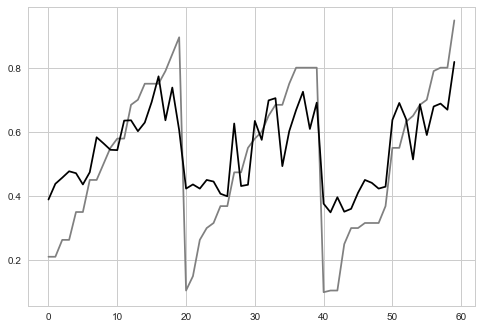

In [193]:
plt.plot(cp_asc[SIM_ID], color='gray')
plt.plot(bf_cp_asc[SIM_ID], color='black')

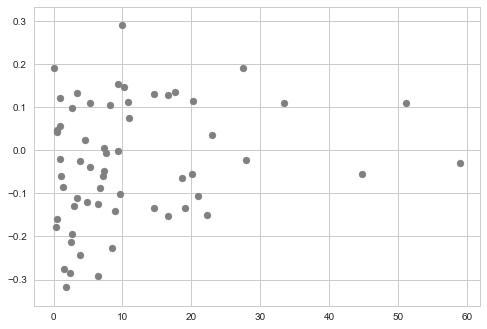

In [195]:
plt.scatter(maxvar, cp_asc[SIM_ID] - bf_cp_asc[SIM_ID], color='gray')

In [140]:
print quant[SIM_ID]
print bf_quant[SIM_ID]

[  4.   9.  16.]
[  3.99145299   8.0491453   15.0965812 ]


In [141]:
observed = cp[SIM_ID]
predicted = bf_cp[SIM_ID]
pagree = np.sum(map(pmatch, zip(observed, predicted))) / float(len(observed))
tmp = filter(lambda pair: pair[0] != 0.5, zip(observed, predicted))
pagree_corr = np.sum(map(pmatch, tmp)) / float(len(tmp))

msd = np.round(np.mean((observed - predicted) ** 2), 4)
rcorr = np.round(pearsonr(observed, predicted)[0], 4)

tot_ss = np.sum((observed - np.mean(observed)) ** 2)
res_ss = np.sum((observed - predicted) ** 2)
r_sq = 1 - (res_ss / tot_ss)

print 'p(agree):\t', pagree
print 'p(agree)2:\t', pagree_corr
print 'r:\t\t', rcorr
print 'msd:\t\t', msd
print 'R2:\t\t', r_sq

p(agree):	0.858333333333
p(agree)2:	0.864406779661
r:		0.7841
msd:		0.0235
R2:		0.563585981763


In [142]:
technion.load_data('comp')
problems_comp = {(gid-1): technion.get_options(gid) for gid in technion.problems}
problems_comp_srt = technion.problems_srt - 1

data = pd.read_csv('paper/data/tpt/tpt_data_comp.csv', index_col=0)
data['group'] = 0
data['problem'] = data['problem'] - 1

In [143]:
m = CHASEProcessModel(problems=problems_comp,
                      startdist='laplace')
pred = predict_from_result(m, problems_comp, data, SIM_ID, FIXED, 
                           fitting = fitting, 
                           outdir=OUTDIR)

In [144]:
cp['process_tpt_comp'] = data.groupby('problem').apply(lambda d: np.mean(d.choice))
bf_cp['process_tpt_comp'] = pred.groupby('problem').apply(lambda d: np.mean(d.pred_cp))

quant['process_tpt_comp'] = mquantiles(data.samplesize)
bf_quant['process_tpt_comp'] = pred[['pred_ss(.25)', 'pred_ss(.5)', 'pred_ss(.75)']].mean().values

cp2 = np.array([data[data.problem==i].choice.mean() for i in problems_comp_srt])
problems_comp_srt_cp = np.array((problems_comp_srt[:20][cp2[:20].argsort()],
          problems_comp_srt[20:40][cp2[20:40].argsort()],
          problems_comp_srt[40:][cp2[40:].argsort()])).ravel()

cp_asc['process_tpt_comp'] = np.array([data[data.problem==i].choice.mean() for i in problems_comp_srt_cp])
bf_cp_asc['process_tpt_comp'] = np.array([pred[pred.problem==i].pred_cp.mean() for i in problems_comp_srt_cp])

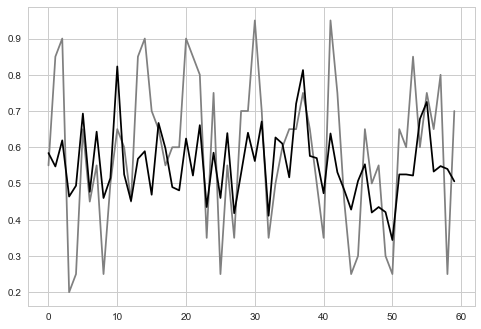

In [129]:
plt.plot(cp['process_tpt_comp'], color='gray')
plt.plot(bf_cp['process_tpt_comp'], color='black')

In [145]:
observed = cp['process_tpt_comp']
predicted = bf_cp['process_tpt_comp']
pagree = np.sum(map(pmatch, zip(observed, predicted))) / float(len(observed))
tmp = filter(lambda pair: pair[0] != 0.5, zip(observed, predicted))
pagree_corr = np.sum(map(pmatch, tmp)) / float(len(tmp))

msd = np.round(np.mean((observed - predicted) ** 2), 4)
rcorr = np.round(pearsonr(observed, predicted)[0], 4)

tot_ss = np.sum((observed - np.mean(observed)) ** 2)
res_ss = np.sum((observed - predicted) ** 2)
r_sq = 1 - (res_ss / tot_ss)

print 'p(agree):\t', pagree
print 'p(agree)2:\t', pagree_corr
print 'r:\t\t', rcorr
print 'msd:\t\t', msd
print 'R2:\t\t', r_sq

p(agree):	0.883333333333
p(agree)2:	0.910714285714
r:		0.5032
msd:		0.0321
R2:		0.212103116321


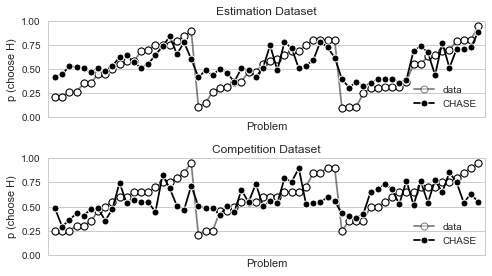

In [146]:
labels = ['Estimation Dataset', 'Competition Dataset']
col = ['black', 'black']

fig, ax = plt.subplots(2, 1, figsize=(7, 4), sharex=True)
for i, study in enumerate(['process_tpt_est', 'process_tpt_comp']):
    axi = ax[i]
    axi.plot(range(1, 61), cp_asc[study], '-o', markerfacecolor='white', markeredgecolor=col[i], 
             markeredgewidth=1, color=col[i], alpha=.5,
             label='data')

    # hacky
    axi.plot(range(1, 61), cp_asc[study], 'o', markerfacecolor='white', markeredgecolor=col[i],
             markeredgewidth=1)


    axi.plot(range(1, 61), bf_cp_asc[study], '-o', markerfacecolor=col[i], markeredgecolor='white', 
             markeredgewidth=1, color=col[i], label='CHASE')
    axi.set_ylim(0, 1)
    axi.set_xlim(0, 61)
    axi.set_xticks([])
    axi.set_xlabel('Problem')
    axi.set_ylabel('p (choose H)')
    axi.set_title(labels[i])
    axi.legend(loc='lower right')
    

plt.tight_layout()
plt.show()
#fig.savefig('%s/tpt_choiceprop_asc.pdf' % FIGDEST, bbox_inches='tight')

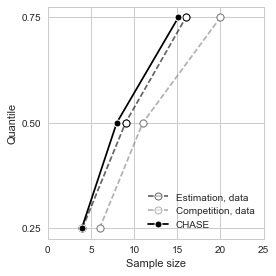

In [147]:
labels = ['Estimation', 'Competition']
col = ['black', 'gray']


fig, ax = plt.subplots(1, 1, figsize=(4, 4))

axi = ax
for i, study in enumerate(['process_tpt_est', 'process_tpt_comp']):

    axi.plot(quant[study], [.25, .5, .75], '--o', color=col[i],
             markerfacecolor='white', markeredgecolor=col[i], 
             markeredgewidth=1, label='%s, data' % labels[i], alpha=.6)
    
    # hacky
    axi.plot(quant[study], [.25, .5, .75], 'o', color=col[i],
             markerfacecolor='white', markeredgecolor=col[i], markeredgewidth=1)

    if i==1:
        axi.plot(bf_quant[study], [.25, .5, .75], '-o', color='black', 
                 markerfacecolor='black', markeredgecolor='white',
                 markeredgewidth=1, label='CHASE')

axi.set_xlim(0, 25)
axi.legend(loc='lower right')
axi.set_xlabel('Sample size')
axi.set_ylabel('Quantile')
axi.set_yticks([.25, .5, .75])

plt.tight_layout()
plt.show()
#fig.savefig('%s/tpt_quantiles.pdf' % FIGDEST, bbox_inches='tight')